In [239]:
""" 
На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:

└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv


---------------------------------------------------------------------------------------------

Например, 
30 декабря три покупателя сделали покупки, 
31 – два (папки 2020-12-30 и 2020-12-31 соответственно). 
Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. 
Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. 
Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.


---------------------------------------------------------------------------------------------

Задачи
1 . 
Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), 
соответствует названию папки, где лежит папка с пользователем)

2.
Выясните, какой пользователь купил больше всего товаров. 
Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

3. 
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
Сколько было продано единиц товара с product_id==56?

4.
Визуализируйте продажи по дням.

5. 
Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.
"""

' \nНа этот раз данные имеют следующую структуру:\n\nзаписываются для каждого пользователя, совершившего покупки, каждый день\nдля каждой даты есть своя папка, внутри неё – папки для каждого пользователя\nвнутри каждой папки есть файл data.csv, где и хранятся данные\nСхематично выглядит так:\n\n└── data\n   ├── 2020-12-30\n   │  ├── FirstName_LastName1\n   │  │   └── data.csv\n   │  ├── FirstName_LastName2\n   │  │   └── data.csv\n   │  └── FirstName_LastName3\n   │      └── data.csv\n   └── 2020-12-31\n      ├── FirstName_LastName1\n      │   └── data.csv\n      └── FirstName_LastName5\n          └── data.csv\n\n\n---------------------------------------------------------------------------------------------\n\nНапример, \n30 декабря три покупателя сделали покупки, \n31 – два (папки 2020-12-30 и 2020-12-31 соответственно). \nПоскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. \nДля других клиентов – по одной.\n\nNote: данные в з

In [240]:
# Как обычно

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [241]:
# Функция для чтения ЦСВ м добавление в датафрейм

# На ввод: 
    # 1) путь до цсв, 
    # 2) name-название папки с именем в str; (смотри в цикле)
    # 3) date-название папки с датой в str;  (смотри в цикле)
    # 3) мастер_дф = общий пустой дф;        (смотри в цикле)

def add_to_csv(csv_path, name, date, master_df):
    
    # Чтение данных из CSV-файла на вводе, индекс колонка задается первая(нулевая)
    df = pd.read_csv(csv_path, index_col=0)
    
    # Добавление столбцов 'name' и 'date' 
    df['name'] = name
    df['date'] = date
    
    # Добавление данных к общему датафрейму
    master_df = pd.concat([master_df, df], ignore_index=True)
    
    return master_df

In [242]:
# Цикл перебирающий цсв файлы в директории

# Инициализация общего датафрейма(дф)
master_dataframe = pd.DataFrame()

# Цикл перебирающий цсв файлы в заданной директории
data_dir = 'C:/Users/tvoya/Desktop/Jupyter/Miniproject_l4/data/'

for path, dirs, files in os.walk(data_dir):   # При вложенности папок и необходимости добраться до дна используем os.walk
    
    # На каждой итерации метод возвращает тройку из ПУТИ к нынешней папке, СПИСОК папок и САМ ФАЙЛ, хранящийся в этой папке.
    # Но ПУТЬ до ФАЙЛА полностью не возвращается 
    # Поэтому будем делать стринг из склеивания ПУТИ, СПИСКА И ФАЙЛА
    
    if len(path.split('/' and '\\')) == 2:
        # Путь до папки в стринг
        folder_path = str('/'.join(path.split('/' and '\\')))
        # Путь до файла в стринг
        file_path = str(files).strip("[]'")
        # Полный путь до файла в стринг
        full_path = folder_path + '/' + file_path
        
        # Вырезаем имя и время и пути для добавления колонов в дф
        name = full_path.split('/')[-2]
        date = full_path.split('/')[-3]
        
        # print(full_path)
        # print(name, date)
        
        # Обновление общего датафрейма через функцию add_to_csv()
        master_dataframe = add_to_csv(full_path, name, date, master_dataframe)


In [243]:
# Призывем дф

master_dataframe

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [244]:
# Сумма по колонке quantity
master_dataframe.quantity.sum()

480

In [245]:
# Выясните, какой пользователь купил больше всего товаров. 
# Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке

# ДВумя способомами, только первый еще продукт_ид возвращает
quantity_by_name = master_dataframe.groupby('name').sum('quantity').sort_values('quantity', ascending=False)
quantity_by_name_2 = master_dataframe.groupby('name').agg({'quantity' : 'sum'}).sort_values('quantity', ascending=False)


<Axes: xlabel='product_id', ylabel='quantity'>

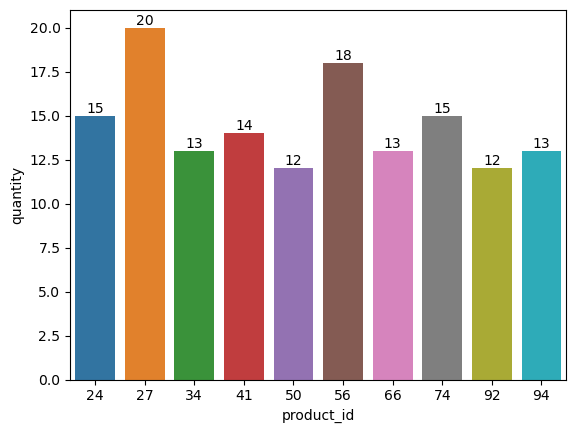

In [266]:
''' Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot),
где:
по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order).'''

top_product = master_dataframe.groupby('product_id', as_index=False).sum('quantity').sort_values('quantity', ascending=False).head(10)

ax = sns.barplot(x=top_product['product_id'], y=top_product['quantity'])
# Добавить подписи к барам
ax.bar_label(ax.containers[0], fontsize=10)


[Text(0, 0, '60'),
 Text(0, 0, '113'),
 Text(0, 0, '61'),
 Text(0, 0, '15'),
 Text(0, 0, '94'),
 Text(0, 0, '68'),
 Text(0, 0, '69')]

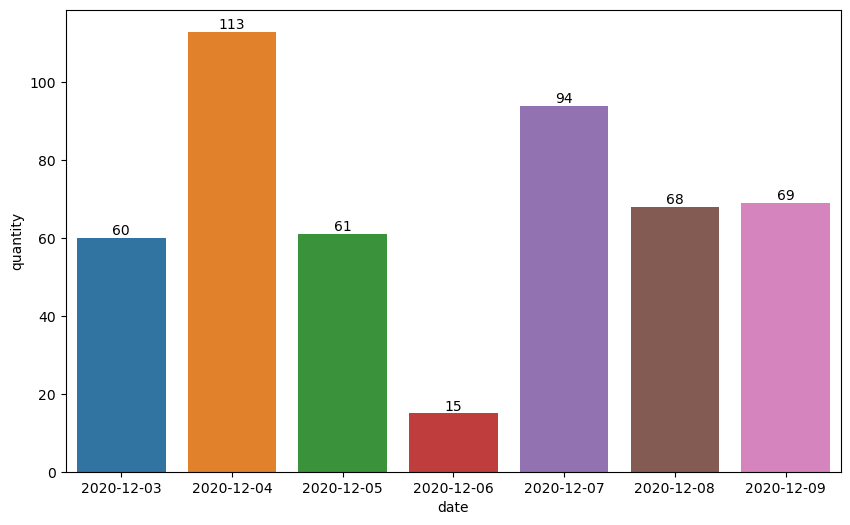

In [273]:
# Посмотрим на продажи по дням! 
# Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). 



top_day = master_dataframe.groupby('date', as_index=False).sum('quantity').sort_values('date', ascending=True).head(10)

# Задать размер графика
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_day['date'], y=top_day['quantity'])
# Добавить подписи к барам
ax.bar_label(ax.containers[0], fontsize=10)

In [305]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

# Например, пользователь Sasha Tsarev дважды приобрел товар 6. 
    # Поскольку покупка была совершена в один и тот же день, 
    # повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, 
    # но в разные дни, поэтому этот случай засчитывается.
    


# Шаг 1: Отфильтровать DataFrame для повторных покупок
unique_purchases = master_dataframe.drop_duplicates(subset=['name', 'product_id', 'date'])
# Шаг 2: Группировка по имени и продукту, подсчет числа уникальных дней покупок
purchase_counts = unique_purchases.groupby(['name', 'product_id']).size().reset_index(name='purchase_count')
# Шаг 3: Отбор только тех, у кого более 1 дня покупок
repeat_buyers = purchase_counts[purchase_counts['purchase_count'] > 1]

# Вывод результатов
    # repeat_buyers

            name  product_id  purchase_count
37  Anton_Ivanov          15               2
92  Petr_Fedorov          94               2
